系统环境
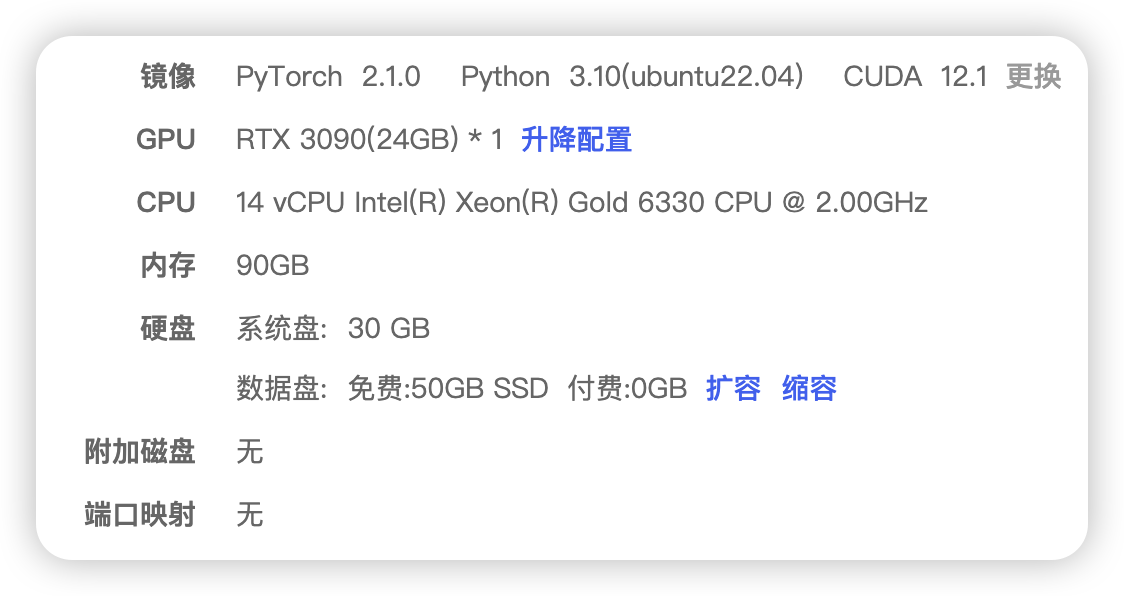

In [ ]:
#设置学术加速
source /etc/network_turbo

In [2]:
#操作步骤
#下载 llama.cpp 项目

In [ ]:
#拉去llama.cpp
git clone https://github.com/ggerganov/llama.cpp

In [ ]:
#进入项目，安装相关库
cd llama.cpp

pip install -r requirements.txt


In [3]:
#配置llama.cpp环境

In [ ]:
# 进入 llama.cpp 文件目录， 按步骤执行下述命令
mkdir build

sudo apt-get update

sudo apt-get install make cmake gcc g++ locate

cmake -B build -DGGML_CUDA=ON -DGGML_CUDA_ENABLE_UNIFIED_MEMORY=1 -DLLAMA_CURL=OFF

cmake --build build --config Release -j8

#运行结果如下

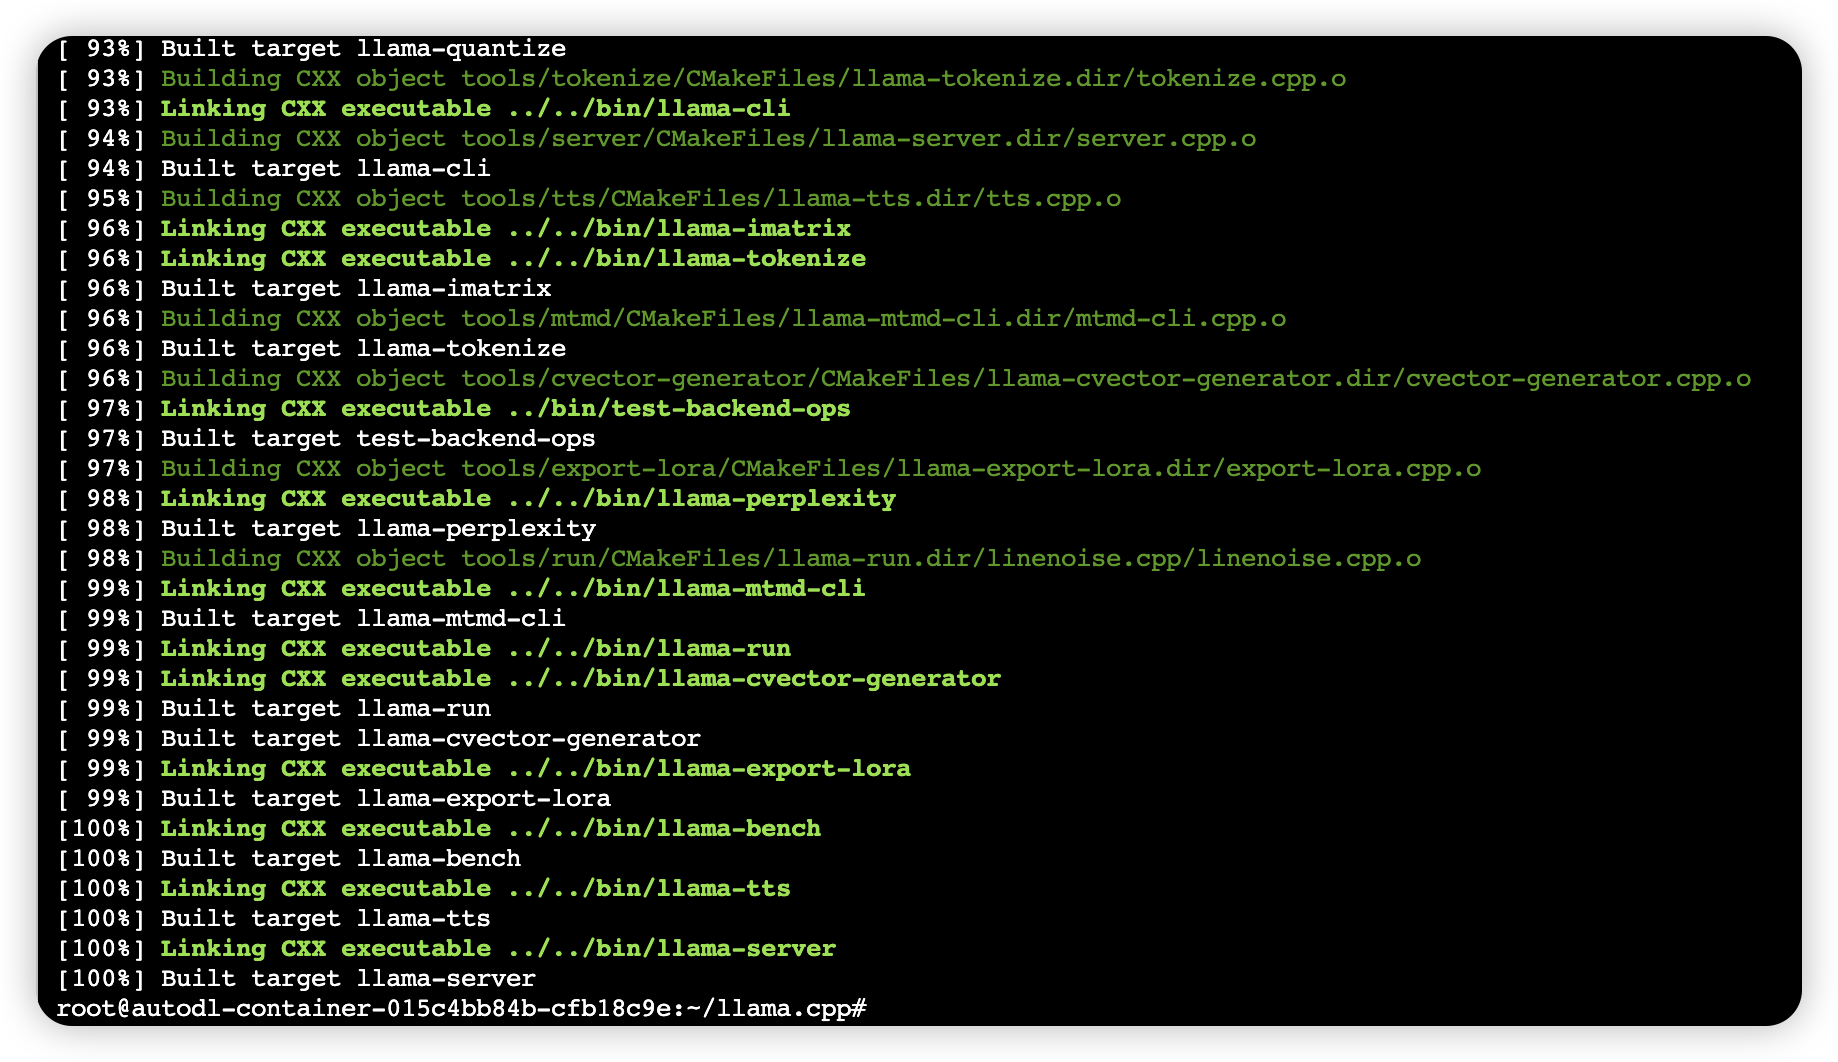

In [ ]:
# 进入 build 目录
cd build

make install
#运行结果如下

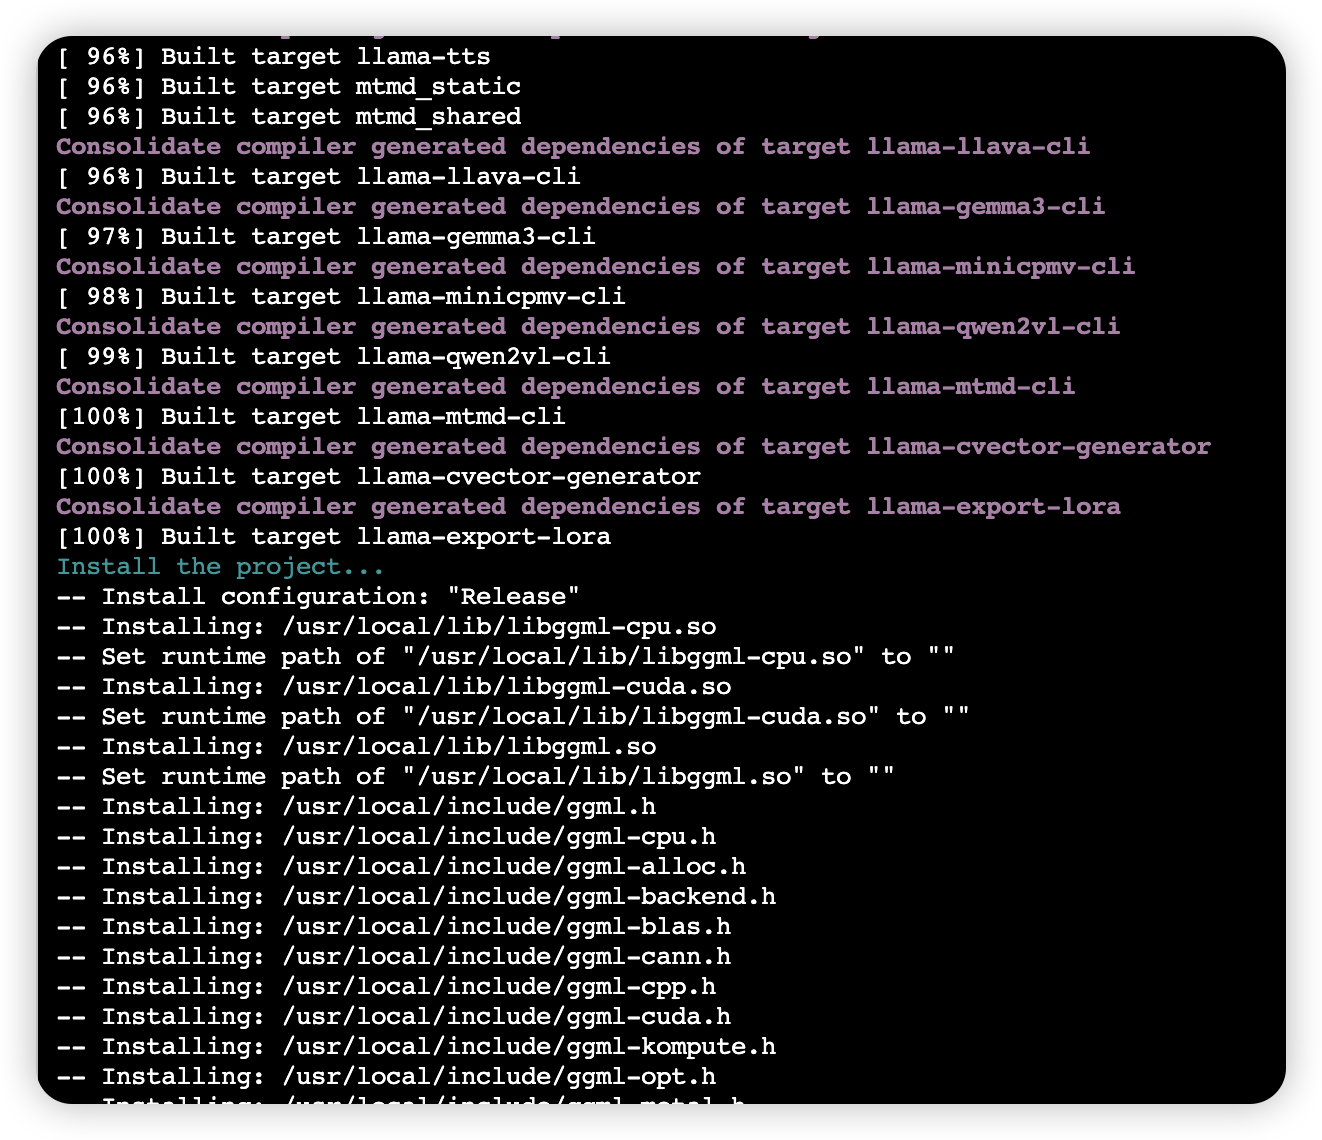

In [4]:
!pip install modelscope==1.11.0

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 96.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 31.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 30.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 52.7

In [5]:
#下载模型
# model_download.py
import os
import torch
from modelscope import snapshot_download, AutoModel, AutoTokenizer
model_dir = snapshot_download('qwen/Qwen2-7B-Instruct', cache_dir='/root/autodl-tmp', revision='master')



2025-05-14 00:34:29,212 - modelscope - INFO - PyTorch version 2.1.2 Found.
2025-05-14 00:34:29,215 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2025-05-14 00:34:29,216 - modelscope - INFO - No valid ast index found from /root/.cache/modelscope/ast_indexer, generating ast index from prebuilt!
2025-05-14 00:34:29,273 - modelscope - INFO - Loading done! Current index file version is 1.11.0, with md5 15253eb2f89e848d420d9a006e7625b4 and a total number of 953 components indexed
Downloading: 100%|██████████| 663/663 [00:00<00:00, 715kB/s]
Downloading: 100%|██████████| 48.0/48.0 [00:00<00:00, 45.0kB/s]
Downloading: 100%|██████████| 243/243 [00:00<00:00, 224kB/s]
Downloading: 100%|██████████| 11.1k/11.1k [00:00<00:00, 10.9MB/s]
Downloading: 100%|██████████| 1.59M/1.59M [00:00<00:00, 10.7MB/s]
Downloading: 100%|█████████▉| 3.67G/3.67G [01:03<00:00, 62.3MB/s]
Downloading: 100%|█████████▉| 3.60G/3.60G [01:04<00:00, 60.1MB/s]
Downloading: 100%|█████████▉| 3.60G/

In [6]:
#模型保存路径
model_dir

'/root/autodl-tmp/qwen/Qwen2-7B-Instruct'

In [ ]:
#启动模型
#下述操作 都是在 llama.cpp/build 目录下进行的操作

# 方式一、在终端 与 模型对话
## --n-gpu-layers 2000 表示将模型的2000层放入GPU
./bin/llama-cli -m 本地gguf格式模型地址 -cnv --n-gpu-layers 2000

#执行效果如下

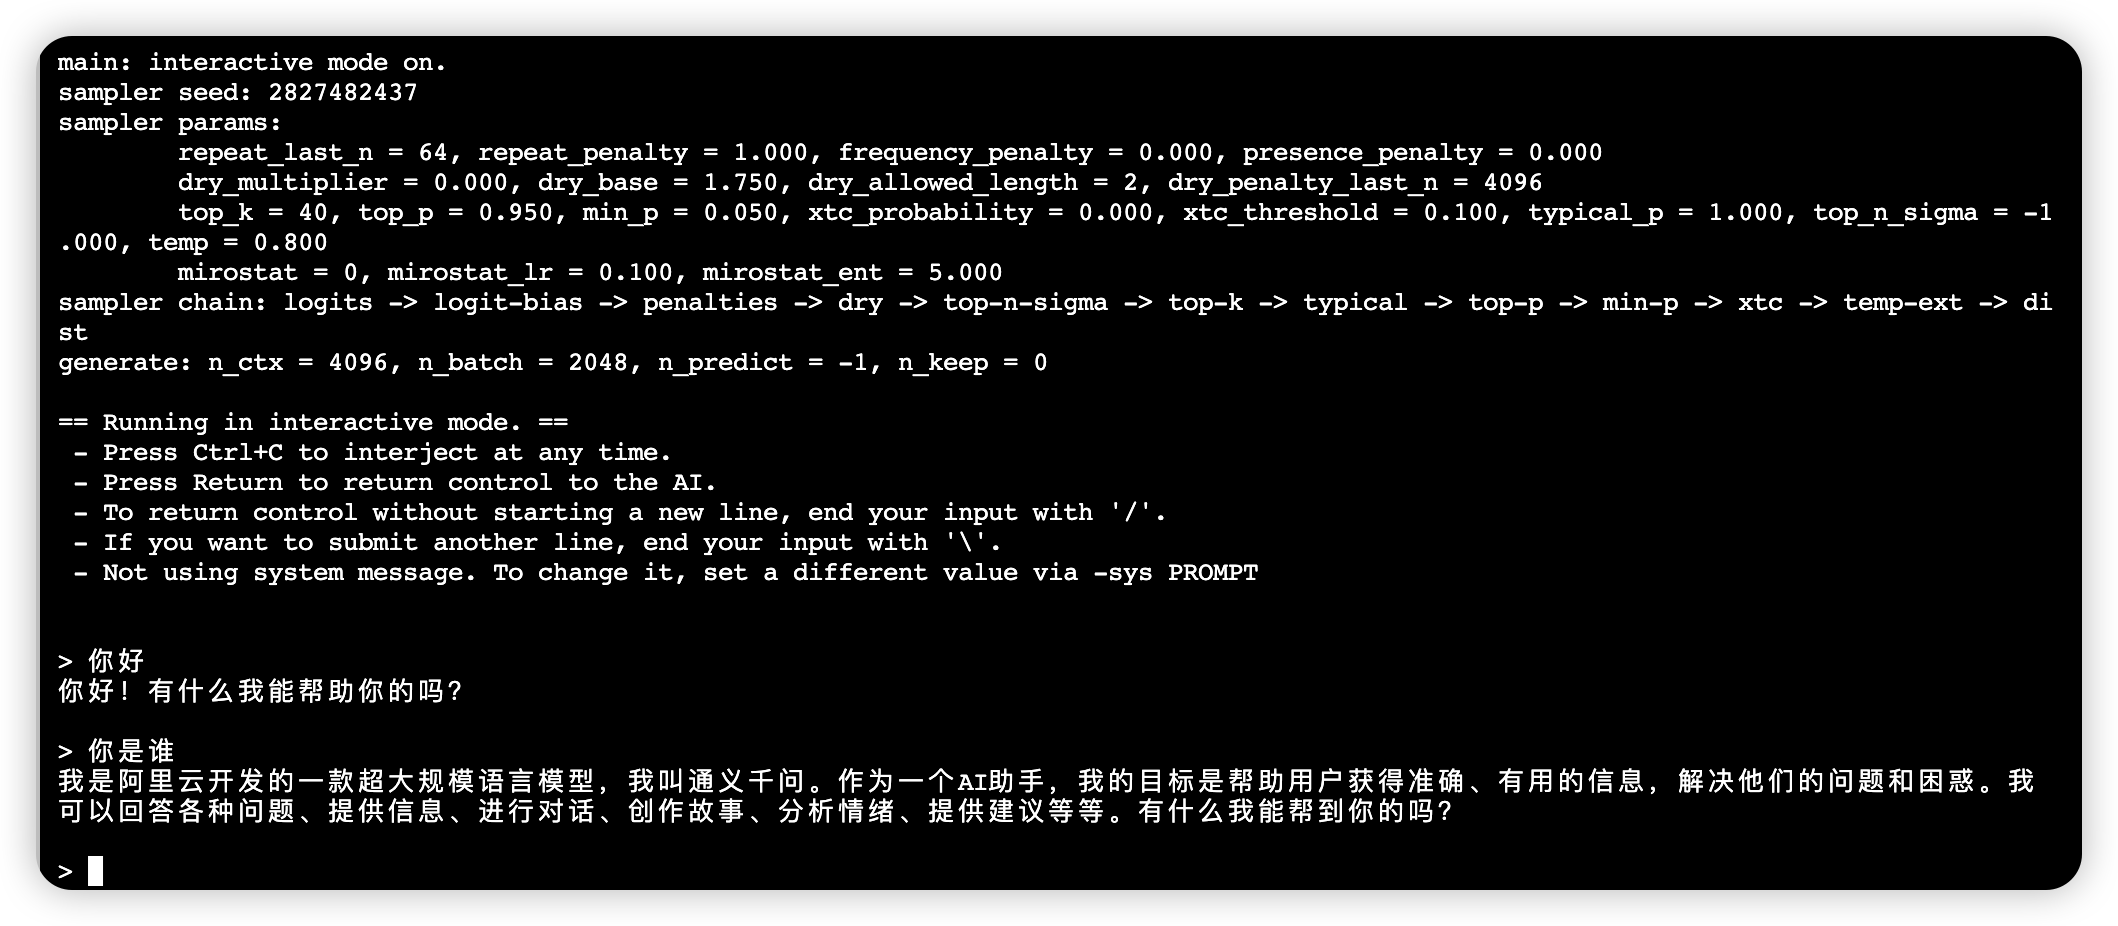

In [ ]:
#方式二、开发 openai 接口
## -ts 1,1 表示有两张 GPU，每个GPU上 存放 一定比例的 层数
## 假如有 3 个GPU，第一个GPU存放 1/5，第二个和第三个GPU各存放 2/5，那么参数应该设置为 -ts 1,2,2 
#./bin/llama-server -m 本地gguf格式模型地址 --port 6006 --n-gpu-layers 2000 -ts 1,1
./bin/llama-server -m 本地gguf格式模型地址 --port 6006 --n-gpu-layers 2000

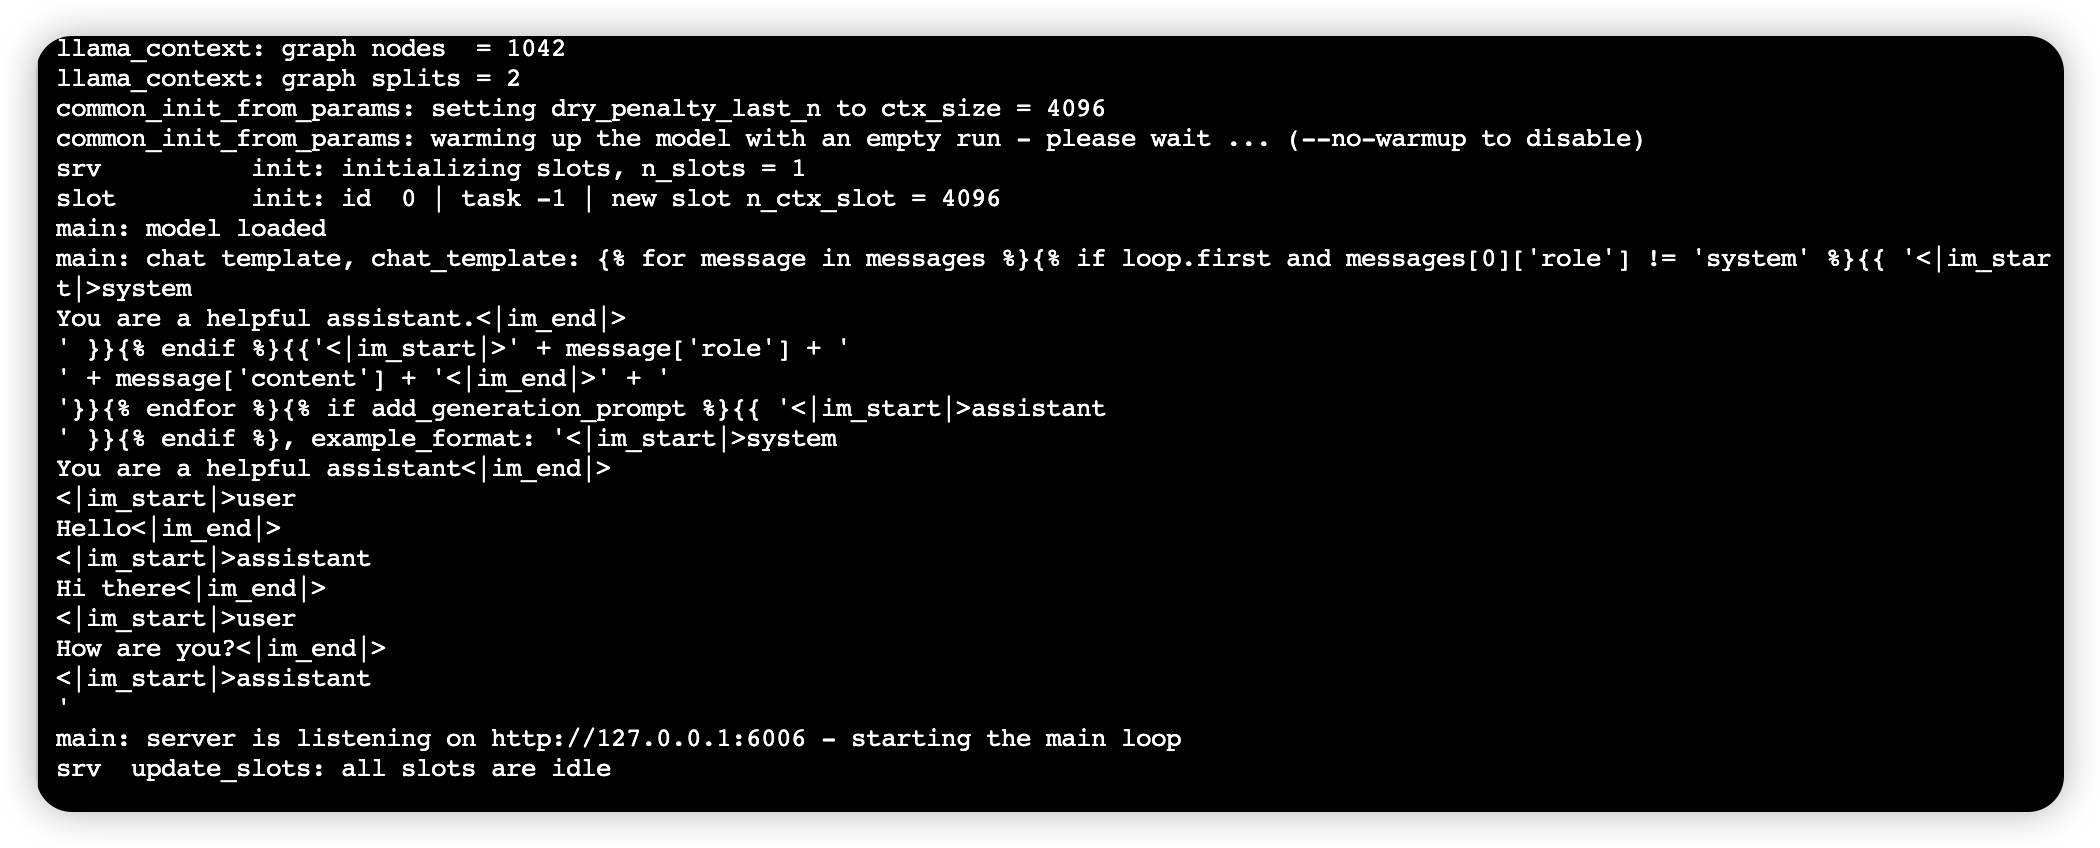

In [8]:
!pip install langchain-openai

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.9/680.9 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: openai
    Found existing installation: openai 1.55.3
    Uninstalling openai-1.55.3:
      Successfully uninstalled openai-1.55.3


In [9]:
# 使用 langchain 测试 openai 接口
#使用langchain 调用 openai 的方式调用
# 引入 OpenAI 支持库  
from langchain_openai import ChatOpenAI  
  
# 连接信息  
base_url ="http://localhost:6006/v1"  
api_key ="EMPTY"  
model_id ="Qwen3_8B"  
  
# 连接大模型  
llm =ChatOpenAI(  
        base_url=base_url,  
        api_key=api_key,  
        model=model_id  
)  
  
# 大模型调用  
result = llm.invoke(input="你可以做什么？")

result.content

'我是一个大规模语言模型，能够生成与给定词语、概念或情境相关的文本。我被设计用来回答各种问题、参与对话、创作故事、诗歌、剧本、撰写电子邮件、文案、代码，以及任何其他基于语言的任务。我还可以帮助解释复杂的想法，提供信息，或协助进行语言翻译。不过，请注意，尽管我努力提供准确的信息和帮助，但我的输出可能包含错误，因此请根据具体情况评估和验证信息。'

In [10]:
# 大模型调用  
result = llm.invoke(input="你是谁？")

result.content

'我是阿里云开发的一款超大规模语言模型，我叫通义千问。'